In [ ]:
%pip install jupyter_contrib_nbextensions

In [ ]:
%pip install explainerdashboard -q

In [ ]:
%pip install ipywidgets

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

from explainerdashboard import ClassifierExplainer, ExplainerDashboard

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [179]:
RANDOM_STATE = 12345
TEST_SIZE = 0.20

- Цель: предсказать возможность покупки (выявить максимально влияющие признаки), задача классификации.
- рассмотрим две модели: KNeighborsClassifier() и RandomForestClassifier()
- в качестве метрик используем accuracy - число верно угаданных меток и confusion_matrix - соотношение угаданных и неугаданных классов

In [180]:
#загрузим предварительно подготовленные данные
df = pd.read_csv(r'E:\ВШЭ_буткемпы\eda_online_shopers\GIT\eda_and_dev_tools\row\online_shoppers_intention_eda.csv')

In [181]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [183]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.164066,31.731468,1166.924308,0.022191,0.042877,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.154745
std,3.321784,176.779107,1.270156,140.575938,44.475503,1873.650562,0.048488,0.048393,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,196.500000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1406.182143,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [184]:
df['Revenue'].value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

выборка несбалансирована(нулевого класса больше примерно в 5 раз чем единичного). возможно, балансировка улучшит метрики модели 

# ML

In [11]:
df.columns

Index(['Unnamed: 0', 'Administrative', 'Administrative_Duration',
       'Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

## Без учета категориальных признаков

In [185]:
# разделим данные на целевую переменную и матрицу объект-признак
y = df['Revenue'] # целевая переменная
X = df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                    'OperatingSystems', 'Region', 'TrafficType'
                    ]] # матрица объект-признак


In [186]:
#разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print("X_train :",X_train.shape, "; X_test :",X_test.shape )
print("Y_train :",y_train.shape, "; Y_test :",y_test.shape)


X_train : (9864, 10) ; X_test : (2466, 10)
Y_train : (9864,) ; Y_test : (2466,)


In [187]:
#KNeighborsClassifier
model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 30, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs_knc = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_knc.fit(X_train, y_train)


print('best_score:', gs_knc.best_score_.round(3))
print('best_params', gs_knc.best_params_)

pred = gs_knc.best_estimator_.predict(X_test) 
print('best_score_test:',accuracy_score(y_test, pred).round(3))
print('confusion_matrix:')
print(confusion_matrix(y_test, pred))

Fitting 3 folds for each of 56 candidates, totalling 168 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

best_score: 0.869
best_params {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
best_score_test: 0.861
confusion_matrix:
[[2035   27]
 [ 316   88]]


In [188]:
#RandomForestClassifier
model = RandomForestClassifier(random_state = RANDOM_STATE ) 

params = {'n_estimators' : np.arange(100, 300, 50),
          'criterion' : ['gini', 'entropy', 'log_loss'],
          'max_depth': np.arange(2, 10, 2)}

gs_rfc = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_rfc.fit(X_train, y_train)


print('best_score:', gs_rfc.best_score_.round(3))
print('best_params', gs_rfc.best_params_)

pred = gs_rfc.best_estimator_.predict(X_test) 
print('best_score_test:',accuracy_score(y_test, pred).round(3))
print('confusion_matrix:')
print(confusion_matrix(y_test, pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 150, 200, 250])},
             scoring='accuracy', verbose=2)

best_score: 0.896
best_params {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}
best_score_test: 0.9
confusion_matrix:
[[1998   64]
 [ 182  222]]


In [189]:
#RandomForestClassifier, добавим балансировку классов
model = RandomForestClassifier(random_state = RANDOM_STATE, class_weight = {0: 0.2, 1: 1} )

params = {'n_estimators' : np.arange(100, 300, 50),
          'criterion' : ['gini', 'entropy', 'log_loss'],
          'max_depth': np.arange(2, 10, 2)}

gs_rfc = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_rfc.fit(X_train, y_train)


print('best_score:', gs_rfc.best_score_.round(3))
print('best_params', gs_rfc.best_params_)

pred = gs_rfc.best_estimator_.predict(X_test) 
print('best_score_test:',accuracy_score(y_test, pred).round(3))
print('confusion_matrix:')
print(confusion_matrix(y_test, pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 0.2, 1: 1},
                                              random_state=12345),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 150, 200, 250])},
             scoring='accuracy', verbose=2)

best_score: 0.879
best_params {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100}
best_score_test: 0.891
confusion_matrix:
[[1867  195]
 [  74  330]]


RandomForestClassifier(class_weight={0: 0.2, 1: 1}, max_depth=8,
                       random_state=12345)

<Axes: xlabel='Gini-Importance', ylabel='Features'>

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Feature Importance')

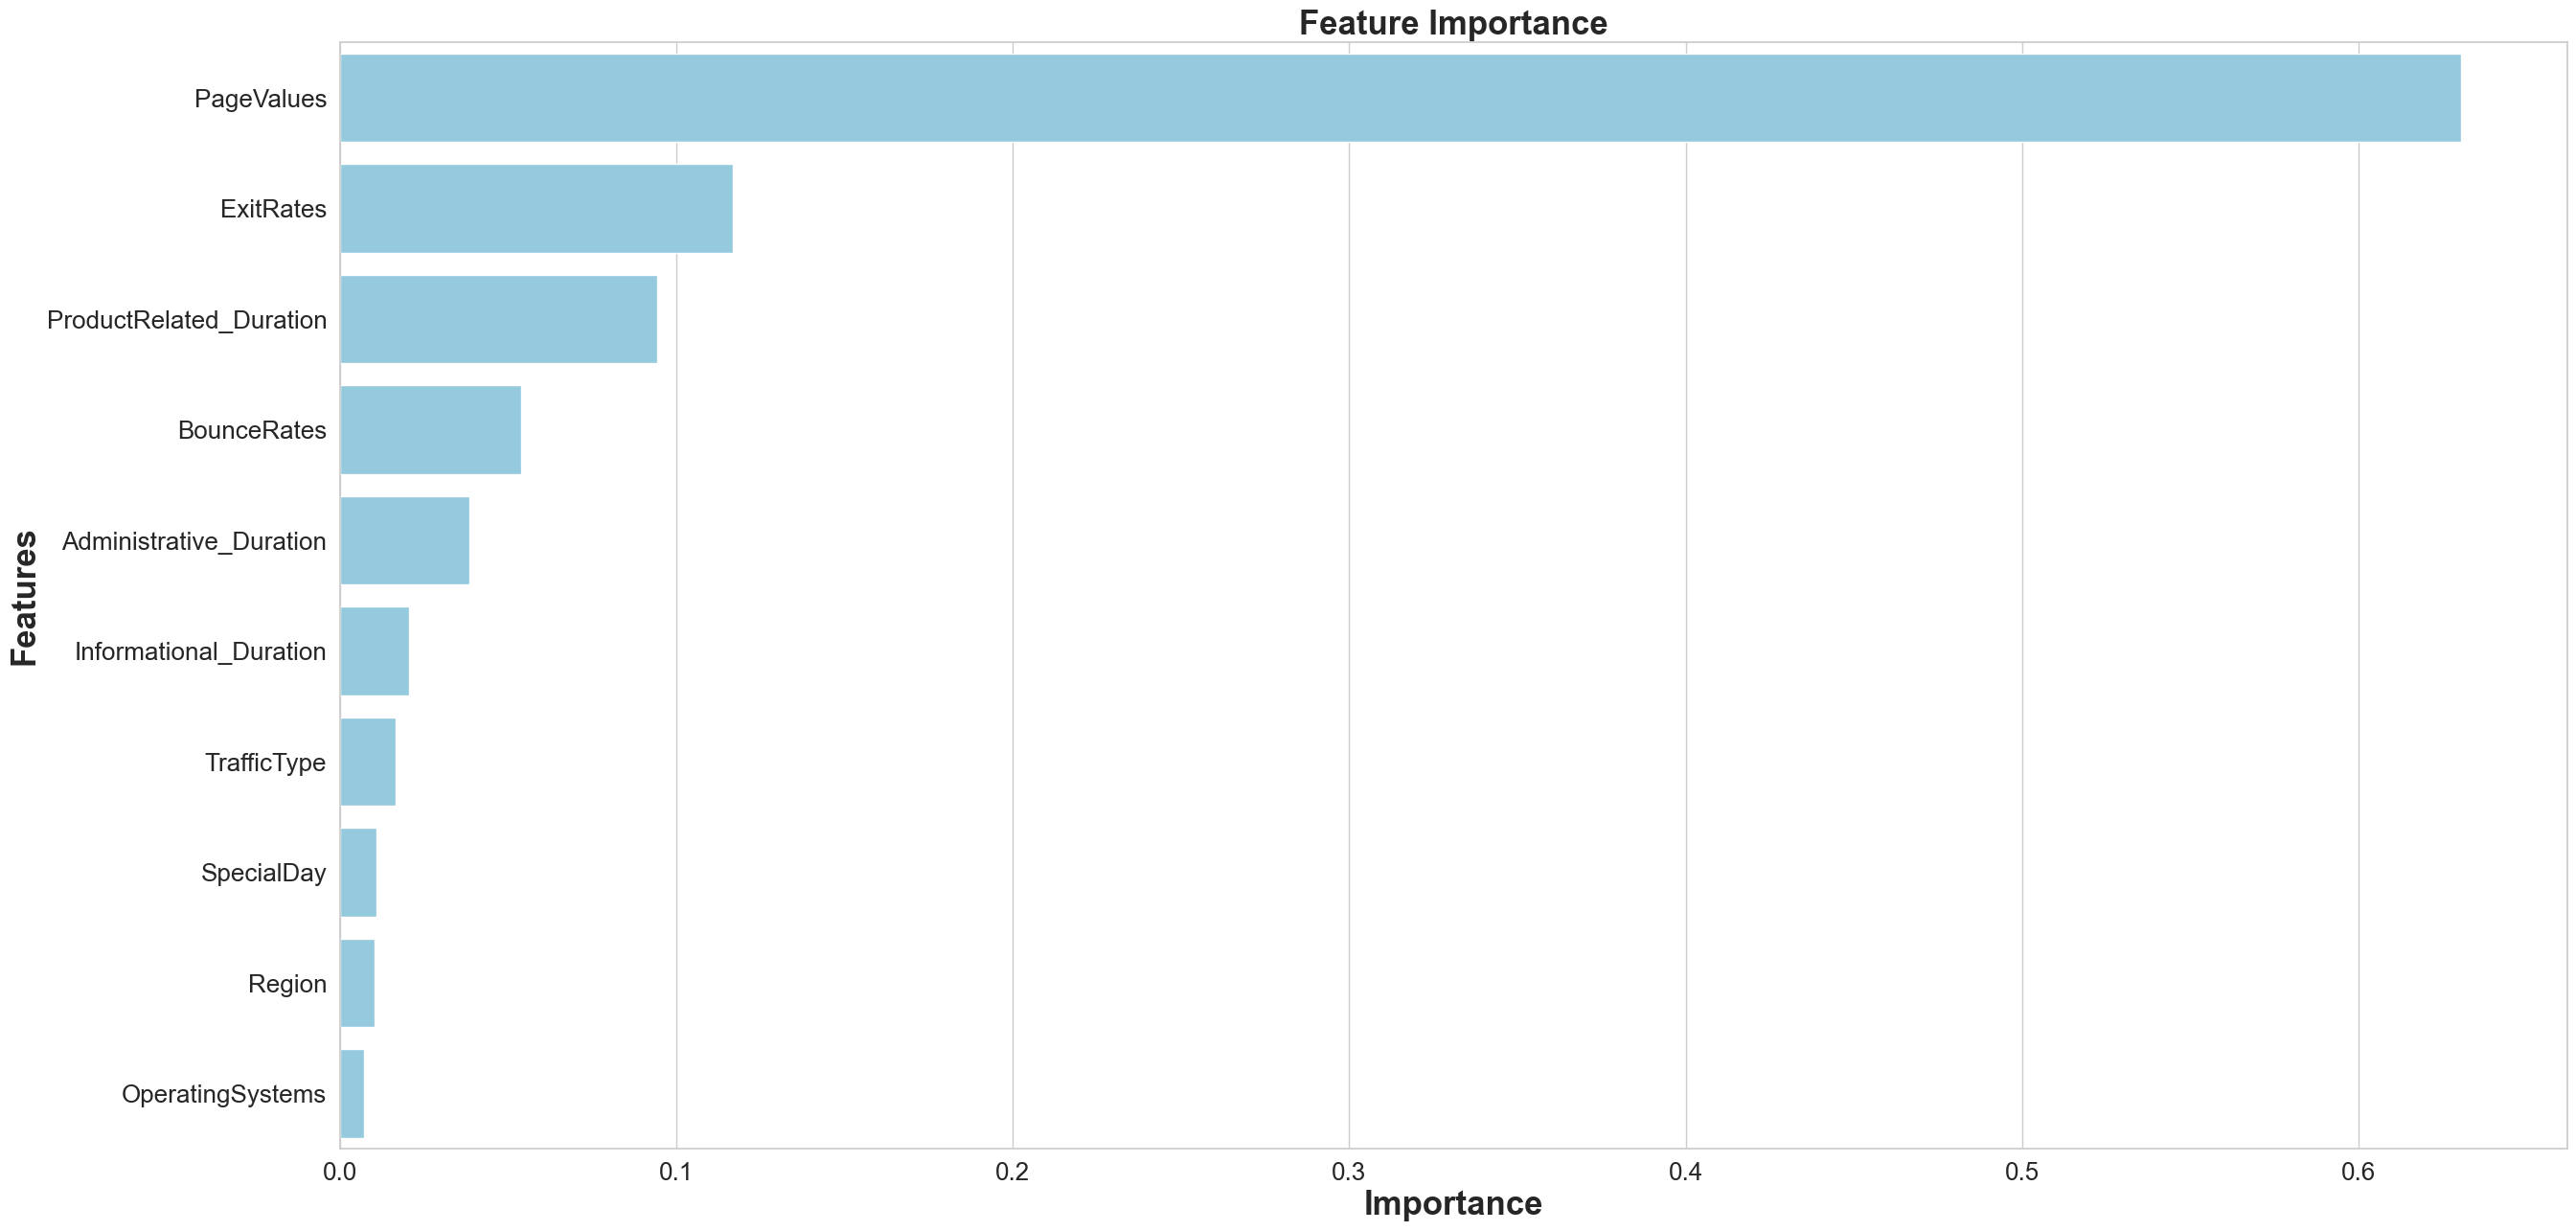

None

,Features,Gini-Importance
0,PageValues,0.630295
1,ExitRates,0.116863
2,ProductRelated_Duration,0.094449
3,BounceRates,0.053879
4,Administrative_Duration,0.038544
5,Informational_Duration,0.020775
6,TrafficType,0.016749
7,SpecialDay,0.010861
8,Region,0.010387
9,OperatingSystems,0.007196


In [191]:
#ради интереса посмотрим на самые важные признаки для RandomForestClassifier 
rfc = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators = 100, criterion='gini', max_depth = 8, class_weight = {0: 0.2, 1: 1})
rfc.fit(X_train, y_train)

feats = {}
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

## С учетом категориальных признаков + нормализация

In [192]:
# разделим данные на целевую переменную и матрицу объект-признак с учетом дополнительных категориальных признаков
y = df['Revenue'] # целевая переменная
X_full = df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                    'OperatingSystems', 'Region', 'TrafficType',
                    'Month','VisitorType'

                    ]] # матрица объект-признак

In [193]:
#разделим увеличенную выборку на тренировочную и тестовую
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print("X_train_full :",X_train_full.shape, "; X_test_full :",X_test_full.shape)
print("Y_train :",y_train.shape, "; Y_test :",y_test.shape)


X_train_full : (9864, 12) ; X_test_full : (2466, 12)
Y_train : (9864,) ; Y_test : (2466,)


In [194]:
#закодируем категориальные переменные + добавим масштабирование числовых признаков
categorical = ['Month','VisitorType']
numeric_features = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                    'OperatingSystems', 'Region', 'TrafficType']

ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = ct.fit_transform(X_train_full)
X_test_transformed = ct.transform(X_test_full)

In [195]:
#KNeighborsClassifier
model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 30, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs_knc = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_knc.fit(X_train_transformed, y_train)


print('best_score:', gs_knc.best_score_.round(3))
print('best_params', gs_knc.best_params_)

pred = gs_knc.best_estimator_.predict(X_test_transformed) 
print('best_score_test:',accuracy_score(y_test, pred).round(3))
print('confusion_matrix:')
print(confusion_matrix(y_test, pred))


Fitting 3 folds for each of 56 candidates, totalling 168 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

best_score: 0.863
best_params {'n_neighbors': 12, 'p': 2, 'weights': 'distance'}
best_score_test: 0.858
confusion_matrix:
[[2033   29]
 [ 321   83]]


In [196]:
#RandomForestClassifier
model = RandomForestClassifier(random_state = RANDOM_STATE) 

params = {'n_estimators' : np.arange(100, 300, 50),
          'criterion' : ['gini', 'entropy', 'log_loss'],
          'max_depth': np.arange(2, 10, 2)}

gs_rfc = GridSearchCV(model, params, scoring ='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_rfc.fit(X_train_transformed, y_train)


print('best_score:', gs_rfc.best_score_.round(3))
print('best_params', gs_rfc.best_params_)

pred = gs_rfc.best_estimator_.predict(X_test_transformed) 
print('best_score_test:',accuracy_score(y_test, pred).round(3))
print('confusion_matrix:')
print(confusion_matrix(y_test, pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 150, 200, 250])},
             scoring='accuracy', verbose=2)

best_score: 0.903
best_params {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100}
best_score_test: 0.898
confusion_matrix:
[[2015   47]
 [ 205  199]]


In [197]:
#RandomForestClassifier, добавим в параметры балансировку по целевой переменной
model = RandomForestClassifier(random_state=RANDOM_STATE, class_weight = {0: 0.2, 1: 1})

params = {'n_estimators' : np.arange(100, 300, 50),
          'criterion' : ['gini', 'entropy', 'log_loss'],
          'max_depth': np.arange(2, 10, 2)}

gs_rfc = GridSearchCV(model, params, scoring ='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_rfc.fit(X_train_transformed, y_train)


print('best_score:', gs_rfc.best_score_.round(3))
print('best_params', gs_rfc.best_params_)

pred = gs_rfc.best_estimator_.predict(X_test_transformed) 
print('best_score_test:',accuracy_score(y_test, pred).round(3))
print('confusion_matrix:')
print(confusion_matrix(y_test, pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 0.2, 1: 1},
                                              random_state=12345),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 150, 200, 250])},
             scoring='accuracy', verbose=2)

best_score: 0.874
best_params {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 100}
best_score_test: 0.882
confusion_matrix:
[[1841  221]
 [  71  333]]


RandomForestClassifier(class_weight={0: 0.2, 1: 1}, max_depth=8,
                       random_state=12345)

<Axes: xlabel='Gini-Importance', ylabel='Features'>

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Feature Importance')

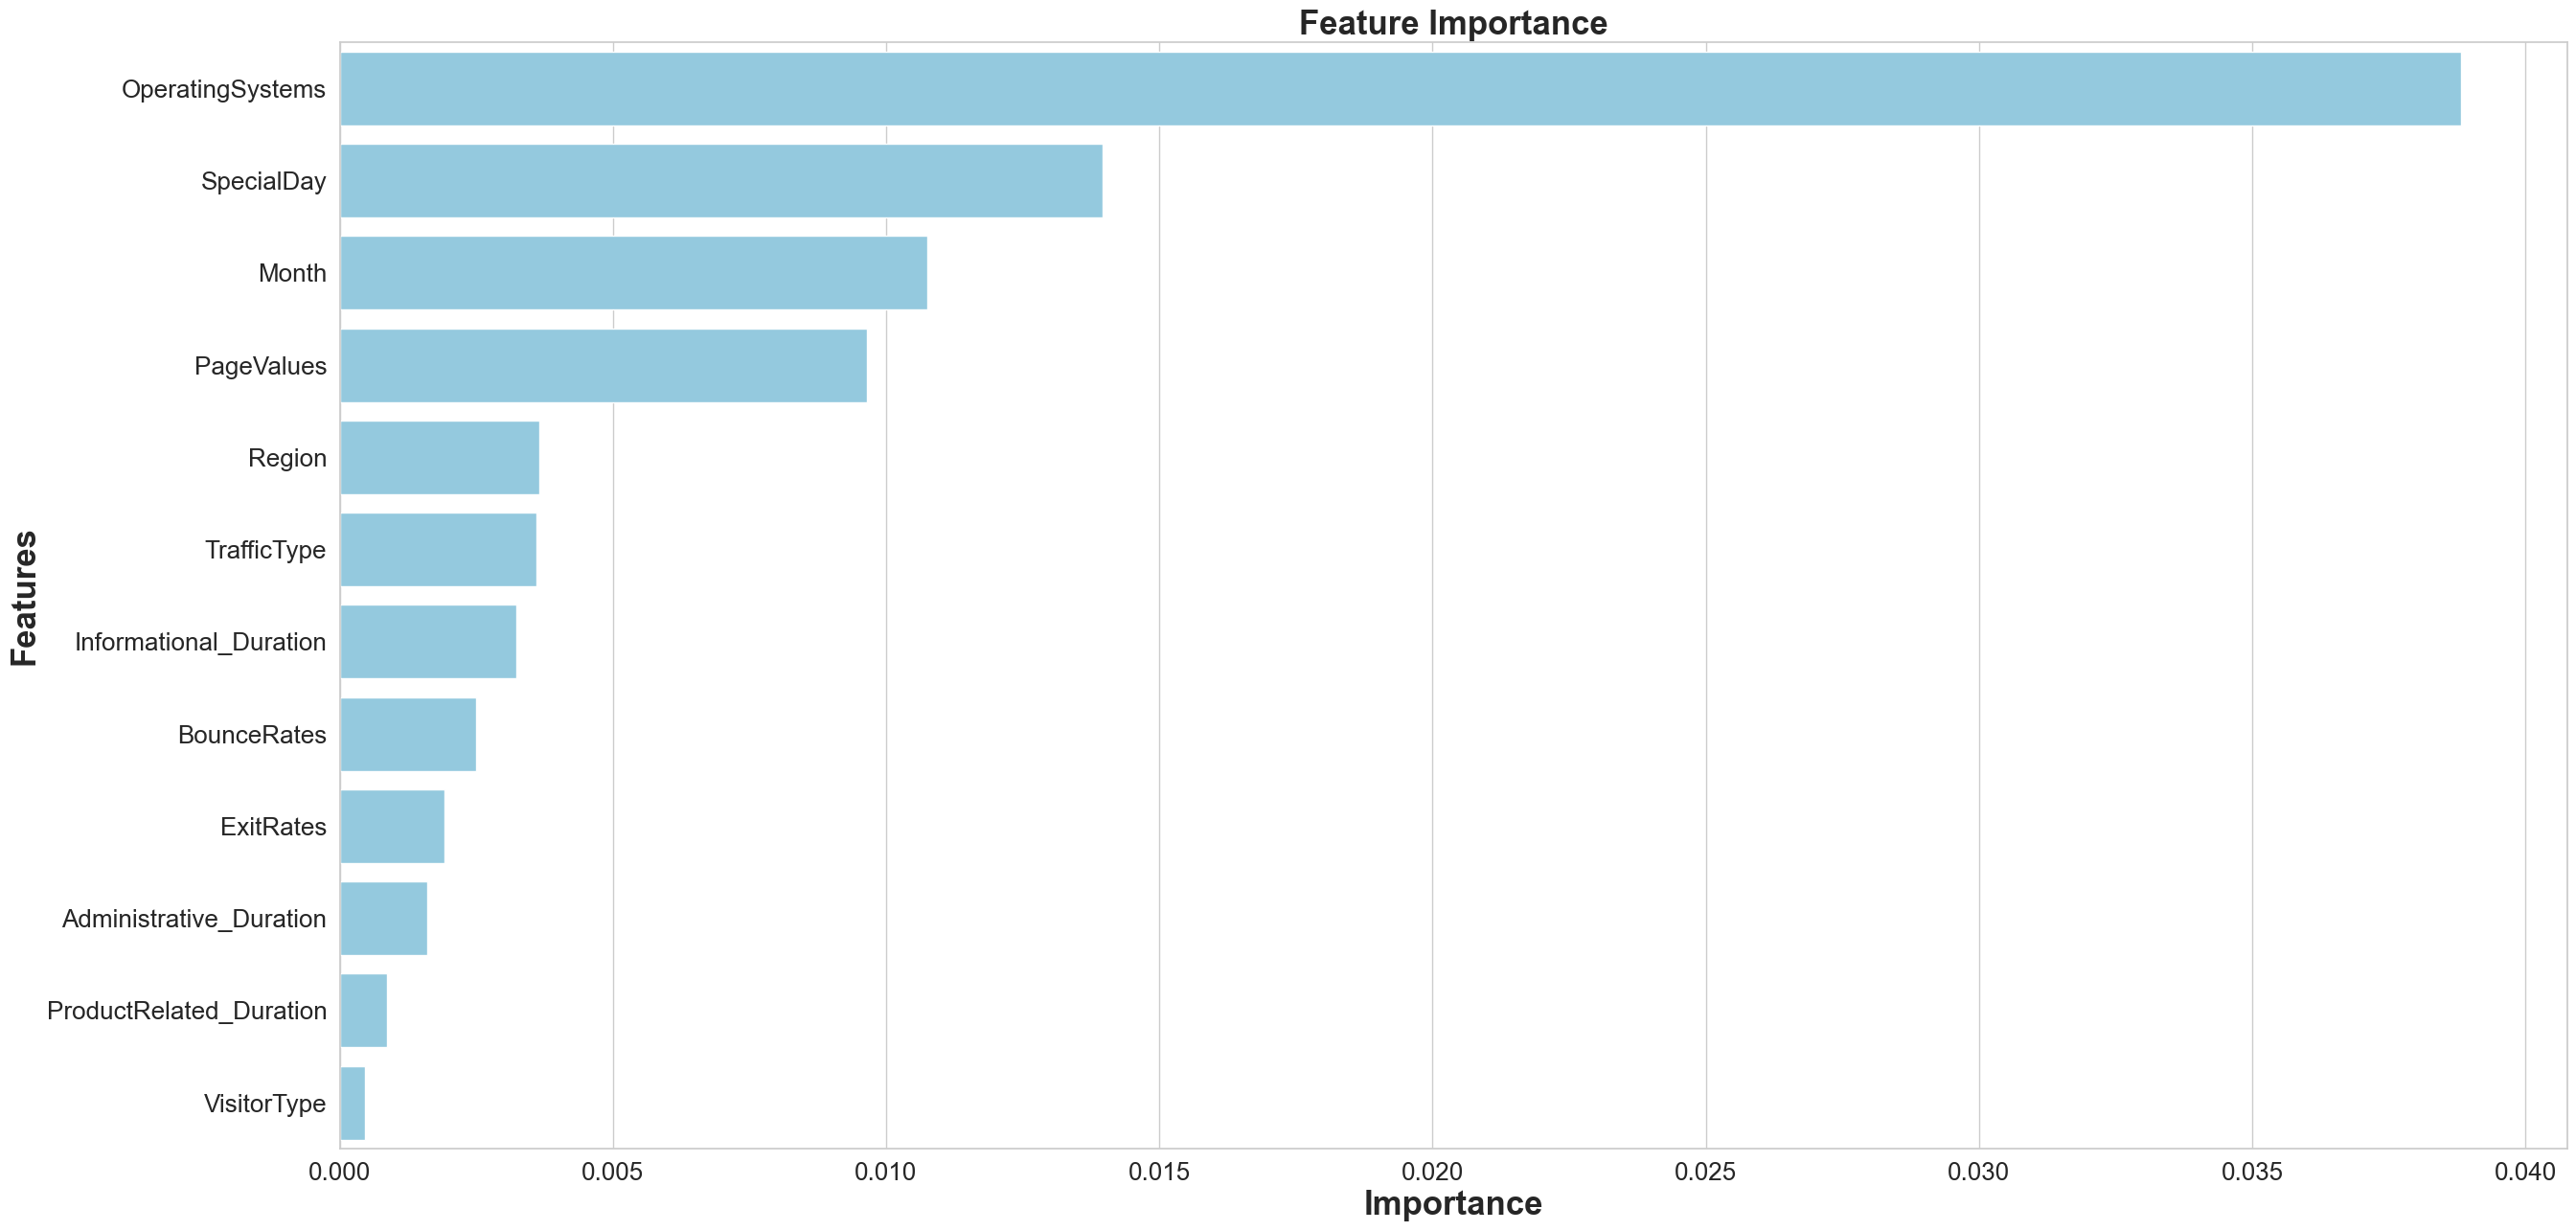

None

,Features,Gini-Importance
0,OperatingSystems,0.038819
1,SpecialDay,0.013971
2,Month,0.010756
3,PageValues,0.009644
4,Region,0.003647
5,TrafficType,0.003597
6,Informational_Duration,0.003233
7,BounceRates,0.002492
8,ExitRates,0.001917
9,Administrative_Duration,0.001612


In [198]:
#ради интереса посмотрим на самые важные признаки для RandomForestClassifier через метрику Gini
rfc = RandomForestClassifier(random_state = RANDOM_STATE, n_estimators = 100, criterion = 'gini',max_depth = 8, class_weight = {0: 0.2, 1: 1})
rfc.fit(X_train_transformed, y_train)

feats = {}
for feature, importance in zip(X_full.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

## Предварительный вывод
- RandomForestClassifier показывает лучшие результаты метрики accuracy на тестовых значениях чем KNeighborsClassifier (0.900 и 0.861 соответсвенно)
- добавление параметра class_weight для RFC (балансировка классов) ухудшило метрику accuracy, но confusion_matrix показало уменьшение ложных определений положительного класса(тех кто сделает покупку) и увеличение правильных угадываний тех, кто ничего не купит
- с учетом категориальных значений и масштабировании числовых признаков accuracy на тестовых значениях чуть снизился (0.897 для RFC и 0.856 для KNC)
- после учета категориальных значений и нормализации числовых значений поменялись признаки влияющие на результат RFC с точки зрения параметра Gini (основынм влияющим признаком был PageValues, стал OperatingSystems)

# Итоговый Pipeline
- в учебных целях будем использовать модель с учетом категориальных признаков, будем считать что для бизнеса оказалось важнее определение потенциально неготовых совершить покупку людей, даже если прогнозы будут ошибочными и уменьшение ложных определений людей готовых к покупке

In [199]:
pipe = Pipeline([
    ('transformer', ct), # преобразование данных    
    # ('selector', SelectKBest()), # оставляем самые важные признаки,
    ('model', RandomForestClassifier(random_state = RANDOM_STATE, class_weight = {0: 0.2, 1: 1})) # обучение модели
    ])

pipe.fit(X_train_full, y_train)

pred_pipe = pipe.predict(X_test_full)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month', 'VisitorType']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['Administrative_Duration',
                                                   'Informational_Duration',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems', 'Region',
                                                   'TrafficType'])])),
                ('model',
                 RandomForestClassifier(class_weight={0: 0.2, 1: 1},
                                        random_state=12345))])

In [200]:
print(accuracy_score(y_test, pred_pipe))
print(confusion_matrix(y_test, pred_pipe))

0.897404703974047
[[1995   67]
 [ 186  218]]


In [201]:
params = {#'selector__k' : [2,3,4],
          'model__n_estimators' : np.arange(100, 300, 50),
          'model__criterion' : ['gini', 'entropy', 'log_loss'],
          'model__max_depth': np.arange(2, 10, 2)}

gs = GridSearchCV(pipe, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train_full, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Month',
                                                                          'VisitorType']),
                                                                        ('scaling',
                                                                         MinMaxScaler(),
                                                                         ['Administrative_Duration',
                                                                          'Informational_Duration',
                                                                          'ProductRelated_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'PageValues',
                                                                          'SpecialDay',
                                                                          'OperatingSystems',
                                                                          'Region',
                                                                          'TrafficType'])])),
                                       ('model',
                                        RandomForestClassifier(class_weight={0: 0.2,
                                                                             1: 1},
                                                               random_state=12345))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy', 'log_loss'],
                         'model__max_depth': array([2, 4, 6, 8]),
                         'model__n_estimators': array([100, 150, 200, 250])},
             scoring='accuracy', verbose=2)

In [202]:
gs.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month', 'VisitorType']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['Administrative_Duration',
                                                   'Informational_Duration',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems', 'Region',
                                                   'TrafficType'])])),
                ('model',
                 RandomForestClassifier(class_weight={0: 0.2, 1: 1},
                                        criterion='entropy', max_depth=4,
                                        random_state=12345))])

In [203]:
pred_gs = gs.predict(X_test_full)

In [204]:
print(accuracy_score(y_test, pred_gs))
print(confusion_matrix(y_test, pred_gs))

0.8815896188158961
[[1841  221]
 [  71  333]]


# Интерпретация признаков

In [205]:
type(X_test_transformed)

numpy.ndarray

In [206]:
# для использования ClassifierExplainer приведем X_test_transformed к типу dataframe
new_features = list(ct.named_transformers_['ohe'].get_feature_names_out())
new_features.extend(numeric_features)

#new_features

In [207]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_features)

X_train_transformed.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,...,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Region,TrafficType
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.104943,0.0,0.025577,0.026667,0.038667,0.000000,0.0,0.142857,0.375,0.157895
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.0,0.142857,1.000,0.631579
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.013387,0.000000,0.142857,0.123454,0.6,0.142857,1.000,0.210526
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.036698,0.140845,0.188967,0.000000,0.8,0.285714,0.000,0.631579
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022214,0.0,0.025966,0.000000,0.031250,0.000000,0.0,0.142857,0.125,0.473684


### Explainer Dashboard

In [208]:
explainer = ClassifierExplainer(gs.best_estimator_, X_test_transformed, y_test)

splitting pipeline...
Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [ ]:
db = ExplainerDashboard(explainer)

In [ ]:
db.run()

## Предварительный вывод
- модель показывает метрику precision (точность правильных определений нужного класса, тех кто купит)  0.601, recall (полнота правильных ответов) 0.824 
- самыми важными признаками через SNAP values модель рассчитала PageValues,  ExitRates, BounceRates на четвертом месте стоит Mounth_Nov(при однофакторном анализе заметили что в ноябре были самые большие продажи) на последнем месте VisitorTypeOther, Month_Aug, Month_Jul. 
- для способа Permutation Importance самыми важными определены признаки PageValues,MonthNov, ExitRates на четвертом месте Mounth_May(самое большое количество посещений в эти дни). На последнем месте ProductRelated_Duration(связь с целевой переменной похожа на квадратичную убывающую функцию), BounceRates, Month_June  

